In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import datetime

plt.rcParams['figure.figsize'] = (15,8)
%matplotlib inline

In [94]:
## This is small code to correct btc.csv file from coindesk. Because that csv has one extra comma at end.

#f = open('btc2.csv','a')
#for line in open('btc.csv').readlines():
#    l = line.strip('\n').strip(',')
#    f.write(l+'\n')
#f.close()

In [95]:
df = pd.read_csv('bt.csv',index_col='Date', parse_dates=True,
                 engine='python')
df2 = pd.read_csv('BTC.csv', index_col='date',parse_dates=True,names=['date','ranknow','open','high','low','close'],
                 engine='python',skiprows=1)
df3 = pd.read_csv('btc2.csv',index_col='date',parse_dates=True,
                  names=['date','txVolume(USD)','adjustedTxVolume(USD)','txCount','marketcap(USD)','price(USD)',
                         'exchangeVolume(USD)', 'generatedCoins','fees','activeAddresses', 'averageDifficulty',
                         'paymentCount','medianTxValue(USD)', 'medianFee','blockSize','blockCount'],
                  skiprows=1)

In [96]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

In [97]:
df3.dropna(subset=['txVolume(USD)','marketcap(USD)'],inplace=True)
df3.fillna(0,inplace=True)

In [98]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

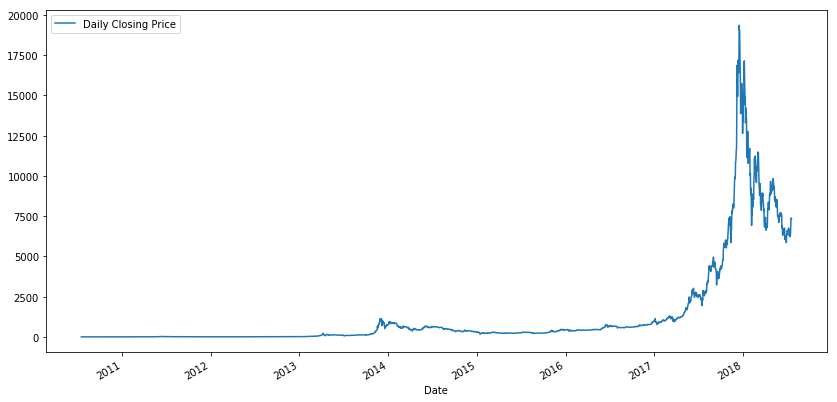

In [99]:
df.plot(figsize=(14,7))

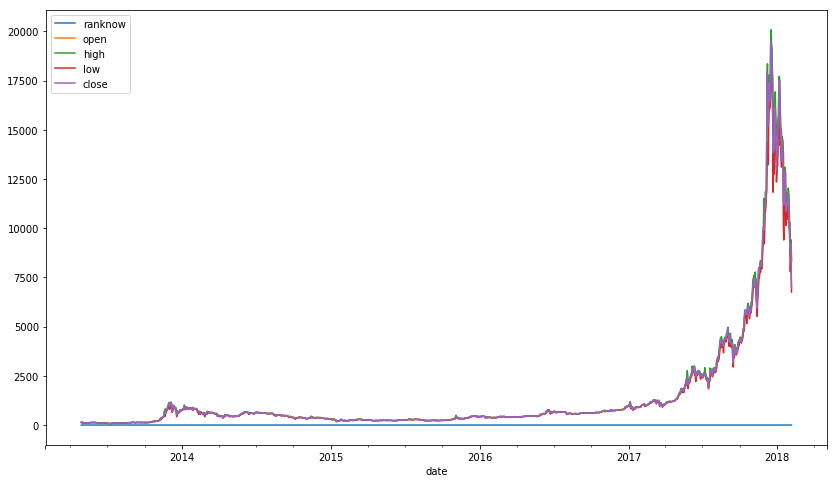

In [100]:
df2.plot(figsize=(14,8))

In [101]:
bitcoin = quandl.get("BCHAIN/MKPRU")

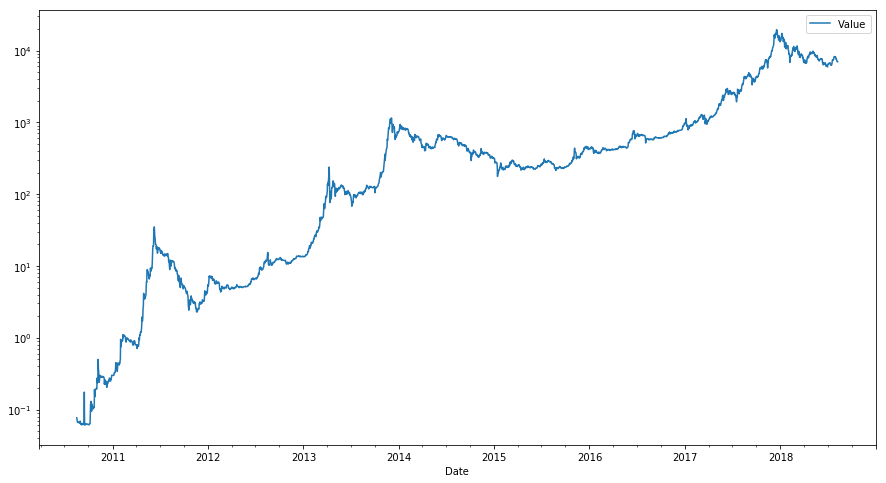

In [102]:
bitcoin['Value'].replace(0, np.nan, inplace=True)
bitcoin = bitcoin.dropna()
bitcoin.Value.plot(logy=True,figsize=(15,8));
plt.legend()

In [103]:
df['Returns'] = (df['Daily Closing Price'].pct_change() + 1).fillna(1)
df.head()

,Daily Closing Price,Returns
Date,,
2010-07-18,0.09,1.000000
2010-07-19,0.08,0.888889
2010-07-20,0.07,0.875000
2010-07-21,0.08,1.142857
2010-07-22,0.05,0.625000


In [105]:
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_returns_bitcoin = np.random.choice(df.Returns, size=(len(dates), 100))
sim_bitcoin_returns = pd.DataFrame(data=simulated_returns_bitcoin, index=dates)
print(sim_bitcoin_returns.shape)
cum_sim_bitcoin = sim_bitcoin_returns.cumprod(axis=0)
print(cum_sim_bitcoin.shape)

(144, 100)
(144, 100)


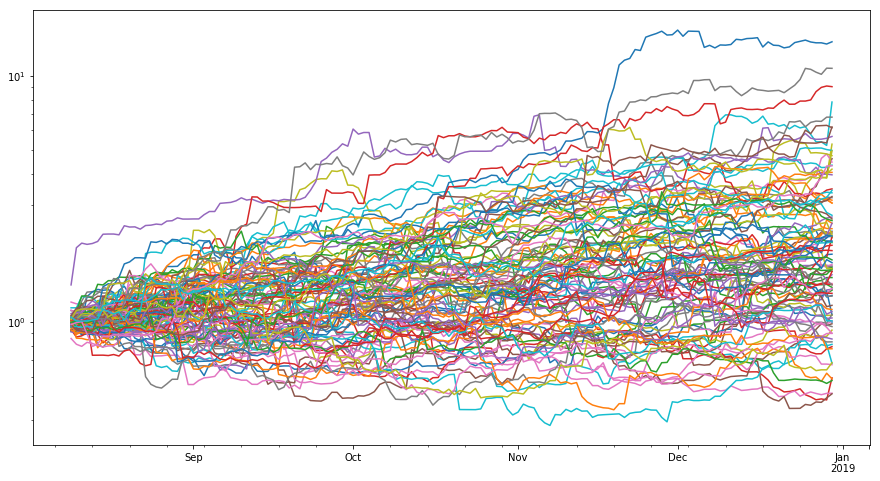

In [106]:
cum_sim_bitcoin.plot(logy=True,legend=False,figsize=(15,8))

In [108]:
future = pd.DataFrame(data=cum_sim_bitcoin, index=dates)
future = future * df['Daily Closing Price'][-1]
future.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-08-09,7586.932163,7519.682051,7189.041223,7316.908367,7438.958927,7037.286226,8839.626241,8162.073011,7331.690000,7390.689338,...,7284.109711,7448.894069,7323.448627,7452.853276,7606.526527,7140.880113,7159.696958,7667.065641,7506.617672,7678.185337
2018-08-10,6929.963177,7557.334250,7818.060955,7286.673208,7442.575338,7262.797755,8697.100639,8072.625636,7218.778171,7287.283006,...,7480.701681,6307.655640,7362.298109,7541.842569,8035.364769,6793.083949,7293.329118,7456.387448,8171.761010,7404.916945
2018-08-11,6990.424404,7585.444879,8127.229296,7531.163142,7806.257462,7218.064739,8684.235106,8923.643479,7298.947143,7115.817523,...,7604.463618,6294.206481,7135.765859,7414.915277,7992.923238,6729.434951,7371.101377,7747.217965,8272.045495,7404.916945
2018-08-12,7021.378313,7620.397011,8283.842812,7500.423701,7723.564057,7365.645989,8212.586826,9704.435750,7669.572951,7340.988149,...,7462.324112,6215.835038,6760.489696,7589.857134,8407.961237,6664.632985,6557.114722,7673.434937,8285.538545,7404.916945
2018-08-13,7092.301326,7107.121024,8446.271103,7463.887190,6781.666001,7448.909667,8212.586826,9743.507022,7585.013161,6973.938742,...,7448.619200,6227.620019,6807.524049,7495.489461,8567.001573,6720.507877,5838.661014,7547.923103,8270.391309,7480.576559


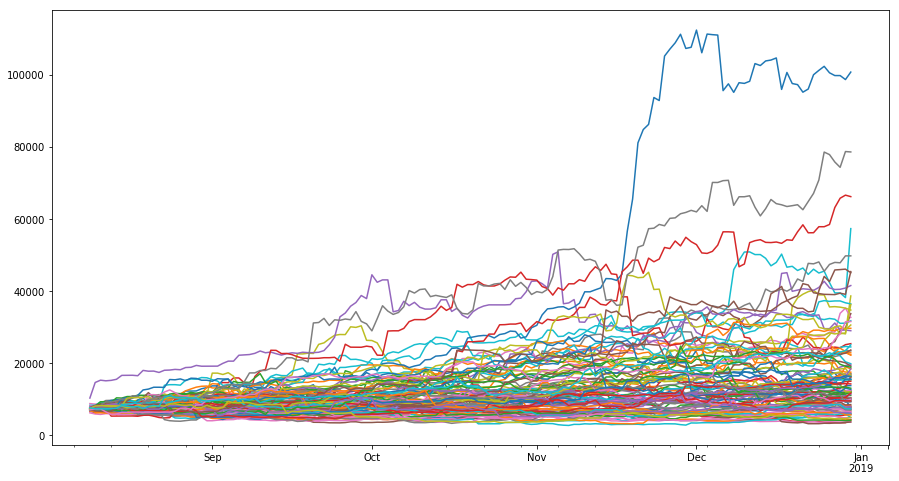

In [109]:
future.plot(legend=False, figsize=(15,8))

Text(0,0.5,'Price ($)')

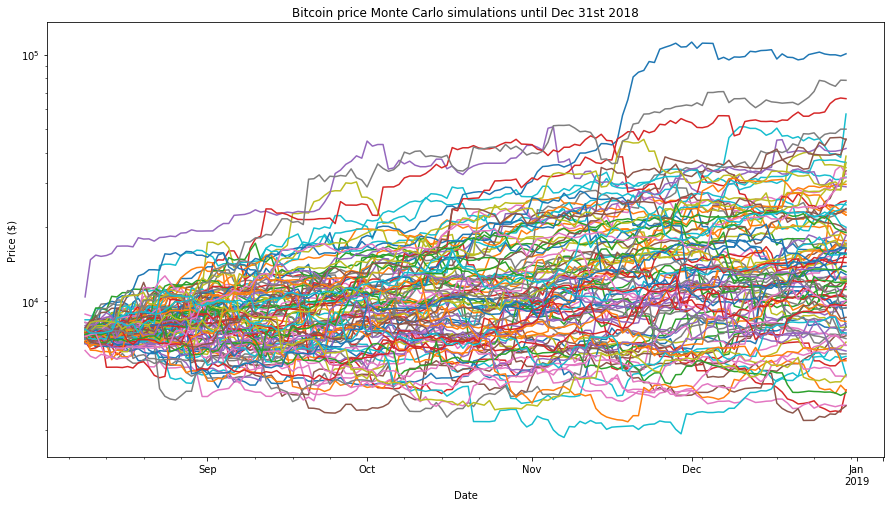

In [110]:
future.plot(logy=True,legend=False, figsize=(15,8),
            title='Bitcoin price Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Price ($)")

In [111]:
bitcoin.tail(5),df.tail(5)

(                  Value
 Date                   
 2018-08-04  7394.499167
 2018-08-05  7247.769167
 2018-08-06  6998.718333
 2018-08-07  6988.079167
 2018-08-08  6993.513333,                      Daily Closing Price   Returns
 Date                                              
 2018-07-15 00:00:00              6349.04  1.016297
 2018-07-16 00:00:00              6726.40  1.059436
 2018-07-17 00:00:00              7314.94  1.087497
 2018-07-18 00:00:00              7378.76  1.008725
 2018-07-19 08:29:00              7331.69  0.993621)

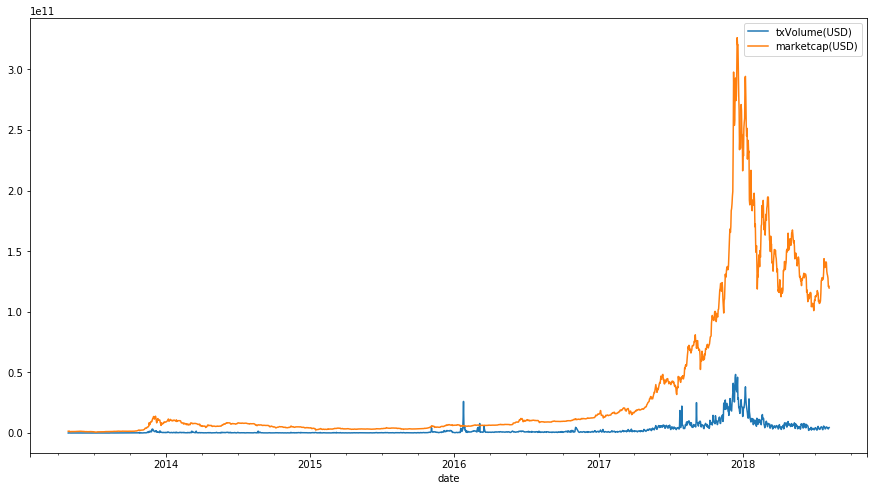

In [112]:
df3[['txVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

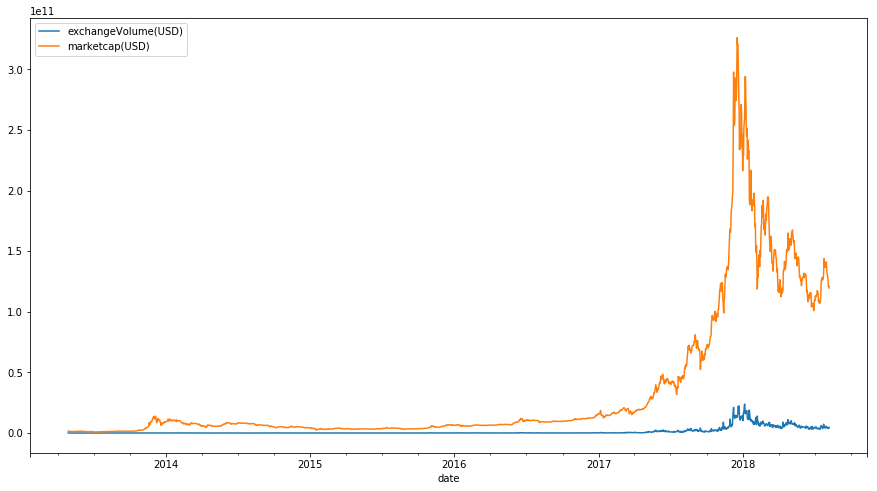

In [113]:
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

In [114]:
df3['NVT'] = df3['marketcap(USD)'] / df3['txVolume(USD)']

In [115]:
df3.tail(5)['NVT']

date
2018-08-03    28.554939
2018-08-04    35.576221
2018-08-05    35.103984
2018-08-06    28.528188
2018-08-07    26.307649
Name: NVT, dtype: float64

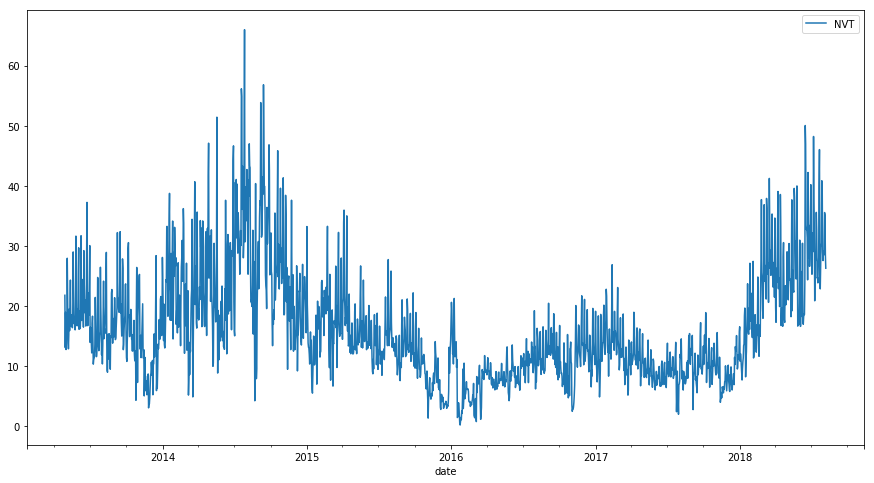

In [116]:
df3[['NVT']].plot(figsize=(15,8))

In [117]:
df3['SMOOTH_NVT'] = np.convolve(df3.NVT.values, np.ones((14,))/14., mode='same')

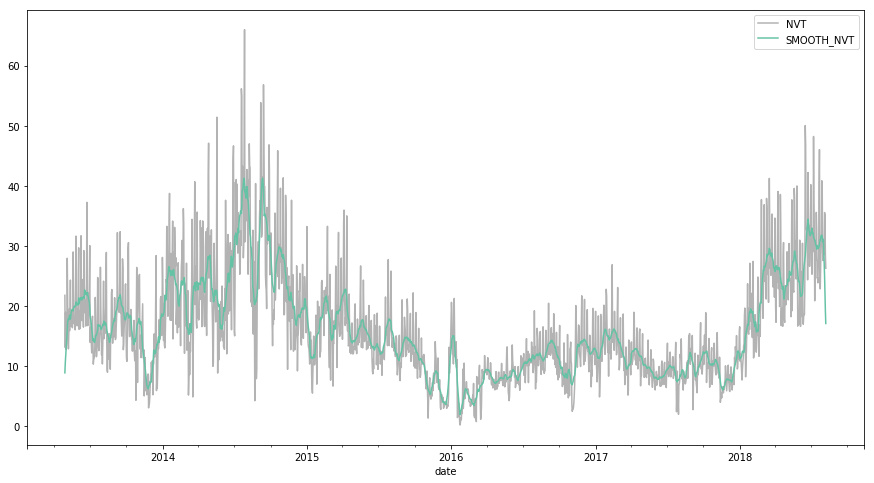

In [118]:
df3[['NVT','SMOOTH_NVT']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

In [119]:
df3['MCAP'] = df3['marketcap(USD)'] / 10e9

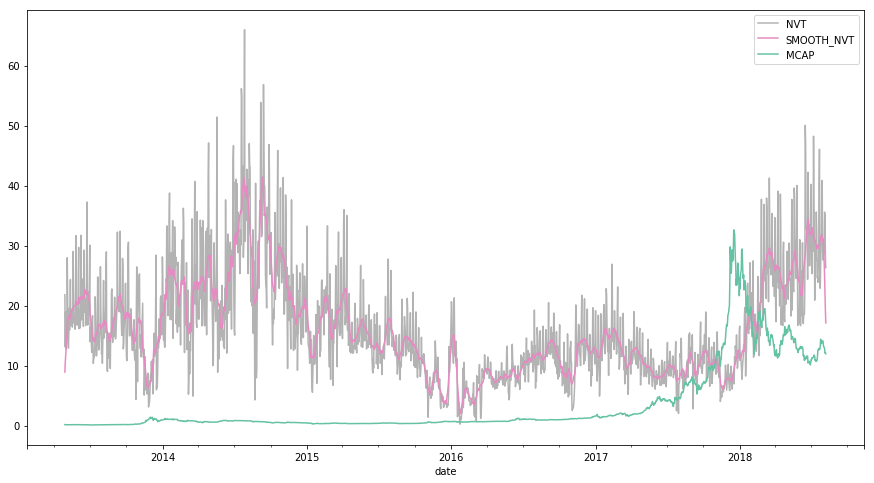

In [120]:
df3[['NVT','SMOOTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

In [121]:
df3.index.name = 'Date'

In [122]:
#df3.reset_index(inplace=True)
#df3.Date = [datetime.date(d.year,d.month,1) for d in df3.Date]
#df3 = df3.groupby(['Date']).sum()
#df3[['NVT','SMTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

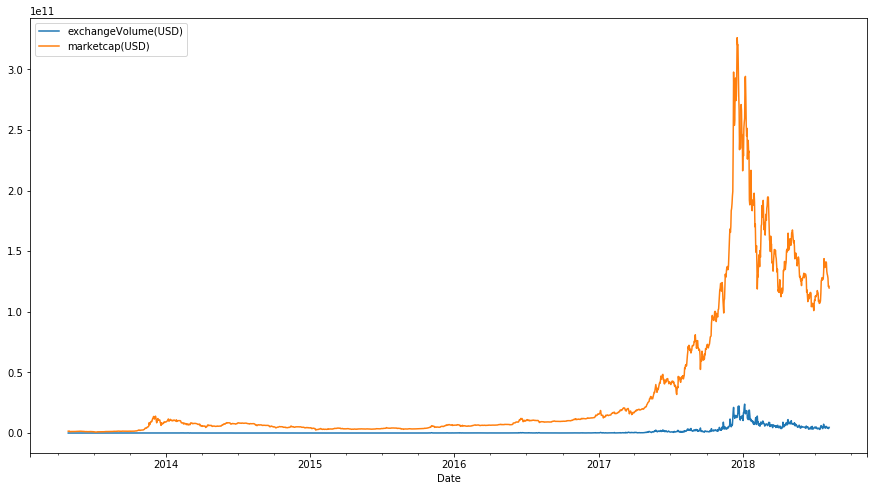

In [123]:
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

Text(0,0.5,'txVolume(USD)')

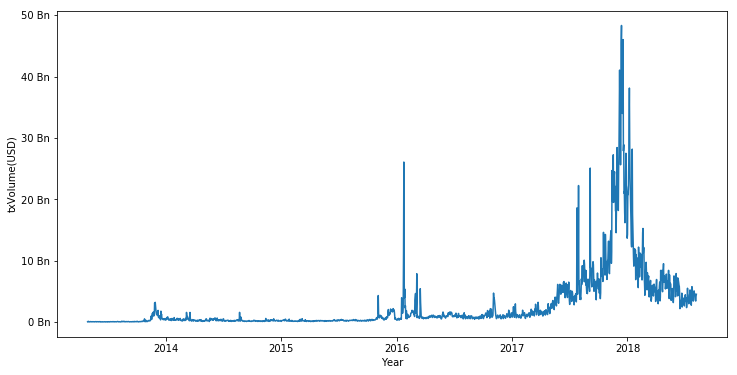

In [124]:
plt.figure(figsize=(12,6))
plt.plot(df3.index.values,df3['txVolume(USD)'].values)
l,t = plt.yticks([0,10e9,20e9,30e9,40e9,50e9],['0 Bn','10 Bn','20 Bn','30 Bn','40 Bn','50 Bn'])                 
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)
plt.xlabel('Year')
plt.ylabel('txVolume(USD)')
#plt.axes()
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)

In [125]:
df3['NVT_R'] = (df3['NVT'].pct_change() + 1).fillna(1)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_nvt = np.random.choice(df3.NVT_R, size=(len(dates), 100))
sim_nvt = pd.DataFrame(data=simulated_nvt, index=dates)
cum_sim_nvt = sim_nvt.cumprod(axis=0)
future2 = pd.DataFrame(data=cum_sim_nvt, index=dates)
future2 = future2 * df3['NVT'][-1]

Text(0,0.5,'NVT')

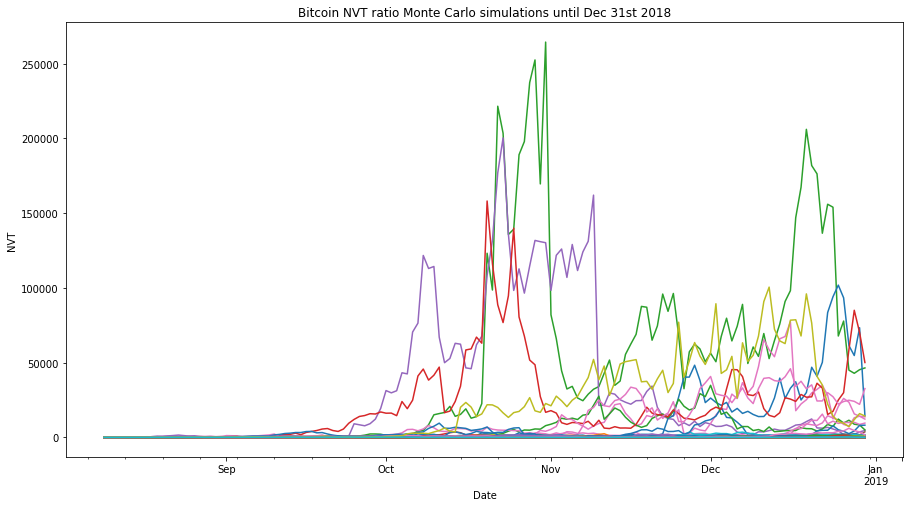

In [126]:
future2.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("NVT")